## **Classify Housing Data Using Decision Tree Classifier**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

In [3]:
house_data = pd.read_csv('housing-classification-iter-0-2.csv')
house_data

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0
...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0
1456,13175,85.0,1542,3,2,0,2,349,0,0
1457,9042,66.0,1152,4,2,0,1,0,0,1
1458,9717,68.0,1078,2,0,0,1,366,0,0


In [4]:
house_data.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
Expensive         0
dtype: int64

In [5]:
house.Expensive.value_counts()

0    1243
1     217
Name: Expensive, dtype: int64

In [6]:
X = house_data

y = house_data['Expensive']

In [8]:
# Split data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [9]:
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
890,8064,60.0,672,3,1,0,2,0,0,0
420,7060,78.0,1344,2,0,0,4,0,0,0
1446,26142,NaN,1188,3,0,0,1,261,0,0
1315,11075,85.0,952,4,2,0,2,280,0,0
384,53107,NaN,1580,3,2,0,2,216,0,0
...,...,...,...,...,...,...,...,...,...,...
802,8199,63.0,728,3,1,0,2,36,0,0
53,50271,68.0,1842,0,1,0,3,857,0,1
350,7820,68.0,1869,2,1,0,2,210,0,1
79,10440,60.0,440,2,0,0,2,74,0,0


In [10]:
X_train.isna().sum()

LotArea           0
LotFrontage     169
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
Expensive         0
dtype: int64

In [11]:
X_test.isna().sum()

LotArea          0
LotFrontage     90
TotalBsmtSF      0
BedroomAbvGr     0
Fireplaces       0
PoolArea         0
GarageCars       0
WoodDeckSF       0
ScreenPorch      0
Expensive        0
dtype: int64

In [12]:
X_train.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

In [13]:
# Input missing values
imputer_kNN = KNNImputer(n_neighbors=4)
imputer_kNN = imputer_kNN.fit(pd.DataFrame(X_train['LotFrontage']))

In [14]:
X_train_LF = pd.DataFrame(np.round_(imputer_kNN.transform(pd.DataFrame(X_train['LotFrontage'])))).astype(int)
X_train_LF.columns = ['LotFrontage']
X_train_LF

,LotFrontage
0,60
1,78
2,70
3,85
4,70
...,...
973,63
974,68
975,68
976,60


In [15]:
X_test_LF = pd.DataFrame(np.round_(imputer_kNN.transform(pd.DataFrame(X_test['LotFrontage'])))).astype(int)
X_test_LF.columns = ['LotFrontage']
X_test_LF

,LotFrontage
0,60
1,89
2,63
3,79
4,76
...,...
477,70
478,60
479,60
480,94


In [16]:
X_test.loc[:,'LotFrontage'] = list(X_test_LF['LotFrontage'])
X_test

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
1436,9000,60,864,3,0,0,2,0,0,0
57,11645,89,860,3,0,0,2,0,0,0
780,7875,63,1237,3,1,0,2,220,0,0
382,9245,79,939,3,0,0,2,144,0,0
1170,9880,76,1096,3,1,576,1,203,0,0
...,...,...,...,...,...,...,...,...,...,...
1037,9240,70,1055,3,1,0,2,0,189,1
106,10800,60,641,2,0,0,1,0,0,0
1307,8072,60,990,3,0,0,2,0,0,0
876,25286,94,1064,3,0,0,2,0,0,0


In [17]:
X_train.loc[:,'LotFrontage'] = list(X_train_LF['LotFrontage'])
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
890,8064,60,672,3,1,0,2,0,0,0
420,7060,78,1344,2,0,0,4,0,0,0
1446,26142,70,1188,3,0,0,1,261,0,0
1315,11075,85,952,4,2,0,2,280,0,0
384,53107,70,1580,3,2,0,2,216,0,0
...,...,...,...,...,...,...,...,...,...,...
802,8199,63,728,3,1,0,2,36,0,0
53,50271,68,1842,0,1,0,3,857,0,1
350,7820,68,1869,2,1,0,2,210,0,1
79,10440,60,440,2,0,0,2,74,0,0


In [18]:
X_train.isna().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
Expensive       0
dtype: int64

In [19]:
X_train = X_train.drop('Expensive', axis=1)
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
890,8064,60,672,3,1,0,2,0,0
420,7060,78,1344,2,0,0,4,0,0
1446,26142,70,1188,3,0,0,1,261,0
1315,11075,85,952,4,2,0,2,280,0
384,53107,70,1580,3,2,0,2,216,0
...,...,...,...,...,...,...,...,...,...
802,8199,63,728,3,1,0,2,36,0
53,50271,68,1842,0,1,0,3,857,0
350,7820,68,1869,2,1,0,2,210,0
79,10440,60,440,2,0,0,2,74,0


In [20]:
y_train

890     0
420     0
1446    0
1315    0
384     0
       ..
802     0
53      1
350     1
79      0
792     1
Name: Expensive, Length: 978, dtype: int64

In [21]:
from sklearn.tree import DecisionTreeClassifier
my_tree = DecisionTreeClassifier()
my_tree.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [22]:
y_pred_train = my_tree.predict(X_train)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_train, y_pred=y_pred_train)

1.0

In [25]:
y_pred_test = my_tree.predict(X_test.drop('Expensive', axis=1))
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

In [26]:
accuracy_score(y_true=y_test, y_pred=y_pred_test)

0.9004149377593361

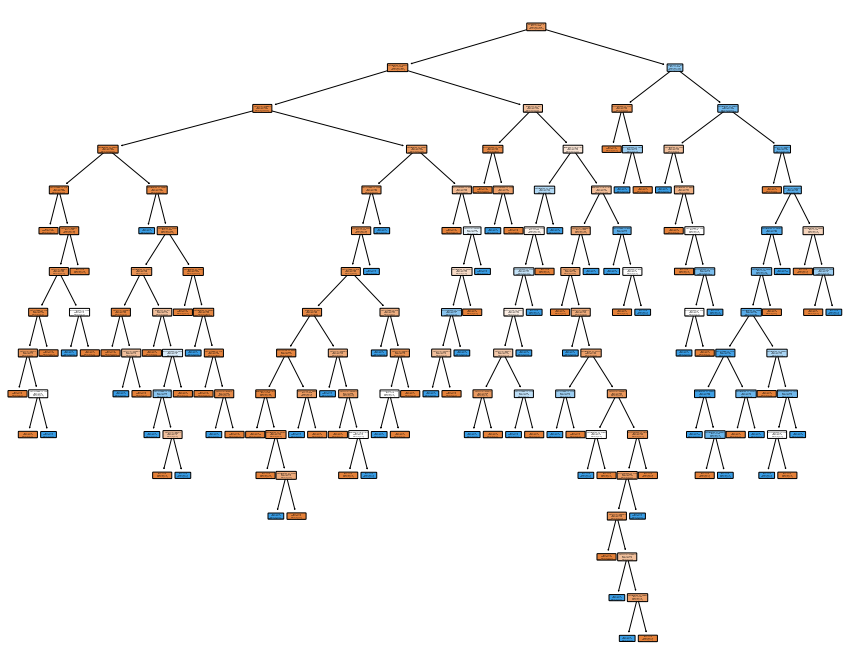

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 12))
plot_tree(my_tree,
          filled=True, 
          rounded=True, 
          class_names=['Not Expensive','Expensive'], 
          feature_names=X_train.columns
          );

## **Implement Classification via Pipeline**

In [46]:
house_data = pd.read_csv('housing-classification-iter-0-2.csv')
house_data

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0
...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0
1456,13175,85.0,1542,3,2,0,2,349,0,0
1457,9042,66.0,1152,4,2,0,1,0,0,1
1458,9717,68.0,1078,2,0,0,1,366,0,0


In [47]:
house_data.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
Expensive         0
dtype: int64

In [48]:
X = house_data.drop('Expensive', axis=1)
X

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0
...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0
1456,13175,85.0,1542,3,2,0,2,349,0
1457,9042,66.0,1152,4,2,0,1,0,0
1458,9717,68.0,1078,2,0,0,1,366,0


In [49]:
y = house_data.Expensive
y

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: Expensive, Length: 1460, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [51]:
from sklearn.pipeline import make_pipeline

In [52]:
imputer = KNNImputer(n_neighbors=4)
my_tree = DecisionTreeClassifier()

In [53]:
pipe = make_pipeline(imputer, my_tree, verbose=True)
pipe

Pipeline(steps=[('knnimputer', KNNImputer(n_neighbors=4)),
                ('decisiontreeclassifier', DecisionTreeClassifier())],
         verbose=True)

In [54]:
pipe.fit(X_train, y_train)

[Pipeline] ........ (step 1 of 2) Processing knnimputer, total=   0.0s
[Pipeline]  (step 2 of 2) Processing decisiontreeclassifier, total=   0.0s


Pipeline(steps=[('knnimputer', KNNImputer(n_neighbors=4)),
                ('decisiontreeclassifier', DecisionTreeClassifier())],
         verbose=True)

In [55]:
y_pred_train = pipe.predict(X_train)
y_pred_train

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [56]:
accuracy_score(y_true=y_train, y_pred=y_pred_train)

1.0

In [57]:
y_pred_test = pipe.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

In [58]:
accuracy_score(y_true=y_test, y_pred=y_pred_test)

0.8926940639269406

## **Implement GridSearchCV into Pipeline**

In [59]:
house_data = pd.read_csv('housing-classification-iter-0-2.csv')
house_data

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0
...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0
1456,13175,85.0,1542,3,2,0,2,349,0,0
1457,9042,66.0,1152,4,2,0,1,0,0,1
1458,9717,68.0,1078,2,0,0,1,366,0,0


In [61]:
X = house_data.drop(['Expensive'], axis=1)
X

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0
...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0
1456,13175,85.0,1542,3,2,0,2,349,0
1457,9042,66.0,1152,4,2,0,1,0,0
1458,9717,68.0,1078,2,0,0,1,366,0


In [62]:
y = house_data.Expensive

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [64]:
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier

from sklearn.impute import SimpleImputer

In [65]:
my_imputer = SimpleImputer()

In [66]:
my_tree = DecisionTreeClassifier()

In [67]:
pipe = make_pipeline(my_imputer, my_tree)
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [71]:
param_grid = {'simpleimputer__strategy': ['mean', 'median'],
              'decisiontreeclassifier__criterion': ['gini', 'entropy'],
              'decisiontreeclassifier__max_depth': range(2, 15),
              'decisiontreeclassifier__min_samples_leaf': range(3, 15),
              'decisiontreeclassifier__min_samples_split': range(2, 40, 2),
              'decisiontreeclassifier__random_state': [25]
             }

param_grid

{'simpleimputer__strategy': ['mean', 'median'],
 'decisiontreeclassifier__criterion': ['gini', 'entropy'],
 'decisiontreeclassifier__max_depth': range(2, 15),
 'decisiontreeclassifier__min_samples_leaf': range(3, 15),
 'decisiontreeclassifier__min_samples_split': range(2, 40, 2),
 'decisiontreeclassifier__random_state': [25]}

In [72]:
Result_best_param = []
Result_best_score = []

for i in [3]:
    search = GridSearchCV(pipe, param_grid, cv=i, scoring='accuracy', verbose=1)
    search.fit(X_train, y_train)
    Result_best_param.append(search.best_params_)
    Result_best_score.append(search.best_score_)

Fitting 3 folds for each of 11856 candidates, totalling 35568 fits


In [73]:
Result_best_param

[{'decisiontreeclassifier__criterion': 'entropy',
  'decisiontreeclassifier__max_depth': 6,
  'decisiontreeclassifier__min_samples_leaf': 5,
  'decisiontreeclassifier__min_samples_split': 2,
  'decisiontreeclassifier__random_state': 25,
  'simpleimputer__strategy': 'median'}]

In [74]:
Result_best_score

[0.9139123684664482]

In [75]:
param_grid = {'simpleimputer__strategy': ['median'],
              'decisiontreeclassifier__criterion': ['entropy'],
              'decisiontreeclassifier__max_depth': [6],
              'decisiontreeclassifier__min_samples_leaf': [5],
              'decisiontreeclassifier__min_samples_split': [2]
             }

In [77]:
search = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy', verbose=1)

In [80]:
search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['entropy'],
                         'decisiontreeclassifier__max_depth': [6],
                         'decisiontreeclassifier__min_samples_leaf': [5],
                         'decisiontreeclassifier__min_samples_split': [2],
                         'simpleimputer__strategy': ['median']},
             scoring='accuracy', verbose=1)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
y_train_pred = search.predict(X_train)

accuracy_score(y_train, y_train_pred)

0.9344422700587084

In [83]:
y_test_pred = search.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.9406392694063926